# Ophthalmic Agentic AI System
## Multi-Agent Diabetic Retinopathy Detection with Explainable AI & Clinical Governance
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/saman-emami/dr-agent/blob/main/test_and_visualize.ipynb)

---

### 📋 Project Overview

This project implements a **mini-agentic AI system** for automated diabetic retinopathy (DR) detection and analysis in retinal fundus images. The system combines vision models with chain-of-thought reasoning and governance policies to deliver clinically interpretable predictions.

### 🎯 Key Features

- **🔬 Vision Agent (RetinaNet)**: Automated DR stage classification (0-4 severity levels) with Grad-CAM explainability heatmaps
- **🧠 Reasoner Agent**: Chain-of-thought clinical reasoning with evidence-based recommendations using LLM or rule-based logic
- **⚖️ Governor Agent**: Policy validation, consistency checking, and comprehensive audit trail generation
- **🎭 Orchestrator**: ReAct-based coordination with automatic fallback mechanisms for robustness

# Clone the repo

In [1]:
!git clone https://github.com/saman-emami/dr-agent
repo_name = "dr-agent"
!mv /content/{repo_name}/src/* /content/

Cloning into 'dr-agent'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 33 (delta 5), reused 32 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 734.34 KiB | 2.95 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# initialize the agent

In [2]:
from vision_agent import VisionAgent
from reasoner_agent import ReasonerAgent
from governor_agent import GovernorAgent
from orchestrator import ReactOrchestrator

vision_agent = VisionAgent()

reasoner_agent = ReasonerAgent()

governor_agent = GovernorAgent()

orchestrator = ReactOrchestrator(
    vision_agent=vision_agent,
    reasoner_agent=reasoner_agent,
    governor_agent=governor_agent,
)

[VisionAgent] INFO: Loading model and processor from AsmaaElnagger/Diabetic_RetinoPathy_detection
INFO:VisionAgent:Loading model and processor from AsmaaElnagger/Diabetic_RetinoPathy_detection
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

[ReasonerAgent] INFO: Initializing medical CoT reasoning with model: eagle0504/qwen-distilled-scout-1.5b-instruct-gen2
INFO:ReasonerAgent:Initializing medical CoT reasoning with model: eagle0504/qwen-distilled-scout-1.5b-instruct-gen2
[ReasonerAgent] INFO: Using device: cuda
INFO:ReasonerAgent:Using device: cuda


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/485 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.11G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

[ReasonerAgent] INFO: Qwen-Distilled-Scout medical reasoning model loaded successfully
INFO:ReasonerAgent:Qwen-Distilled-Scout medical reasoning model loaded successfully
[GovernorAgent] INFO: GovernorAgent initialized with model version: v1.0
INFO:GovernorAgent:GovernorAgent initialized with model version: v1.0
[GovernorAgent] INFO: Strict mode: False, Confidence threshold: 0.65
INFO:GovernorAgent:Strict mode: False, Confidence threshold: 0.65
[Orchestrator] INFO: ReactOrchestrator initialized: llm_retries=3
INFO:Orchestrator:ReactOrchestrator initialized: llm_retries=3


In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from PIL import Image
import numpy as np


def visualize_ophthalmology_analysis(result, image_path):
    """
    Visualize and print ophthalmic AI analysis results.

    Args:
        result: Object containing final_result with prediction data
        image_path: Path to the original retinal image
    """

    final_result = result.final_result
    prediction = final_result["prediction"]
    confidence = final_result["confidence"]
    reasoning = final_result["reasoning"]
    explanation = final_result["explanation"]
    governance = final_result["governance"]
    key_regions = final_result["key_regions"]

    print(f"\n🏥 PREDICTION:   {prediction}")
    print(f"📈 CONFIDENCE:   {confidence:.1%}")
    print(f"✓ VALIDATED:     {governance['validated']}")
    print(f"\nREASONING:\n{reasoning}\n")
    print(f"EXPLANATION:\n{explanation}")

    fig = plt.figure(figsize=(10, 10))
    gs = GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.3)

    ax1 = fig.add_subplot(gs[0, 0])
    img = np.array(Image.open(image_path).convert("RGB"))
    ax1.imshow(img)
    ax1.set_title("Original Retinal Image", fontsize=12, fontweight="bold")
    ax1.axis("off")

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(key_regions)
    ax2.set_title(
        f"Grad-CAM Attention Map\nConfidence: {confidence:.1%}",
        fontsize=12,
        fontweight="bold",
    )
    ax2.axis("off")

    fig.suptitle(
        f"Ophthalmic AI Analysis - {prediction}", fontsize=14, fontweight="bold"
    )

    plt.tight_layout()
    plt.show()

[Orchestrator] INFO: Starting ReAct orchestration - Session: 29b28479-7ca3-4aaa-bf7c-429cfa78502e
INFO:Orchestrator:Starting ReAct orchestration - Session: 29b28479-7ca3-4aaa-bf7c-429cfa78502e
[VisionAgent] INFO: Processed image_id=232285ff-6a8b-49e8-bc57-7019947f2131 | Stage=4 | Confidence=0.8376
INFO:VisionAgent:Processed image_id=232285ff-6a8b-49e8-bc57-7019947f2131 | Stage=4 | Confidence=0.8376
[Orchestrator] INFO: Vision: stage=4, confidence=83.76%
INFO:Orchestrator:Vision: stage=4, confidence=83.76%
[ReasonerAgent] INFO: Reasoning mode switched to: LLM
INFO:ReasonerAgent:Reasoning mode switched to: LLM
[Orchestrator] INFO: Phase 1: LLM reasoning (max 3 attempts)
INFO:Orchestrator:Phase 1: LLM reasoning (max 3 attempts)
[Orchestrator] INFO: Iteration 1: LLM reasoning
INFO:Orchestrator:Iteration 1: LLM reasoning
[ReasonerAgent] INFO: Executing LLM-based medical chain-of-thought reasoning
INFO:ReasonerAgent:Executing LLM-based medical chain-of-thought reasoning
Setting `pad_token_id

Analysing: 042470a92154.png


[ReasonerAgent] INFO: Reasoning complete for image_id 232285ff-6a8b-49e8-bc57-7019947f2131: Proliferative DR with 83.8% confidence
INFO:ReasonerAgent:Reasoning complete for image_id 232285ff-6a8b-49e8-bc57-7019947f2131: Proliferative DR with 83.8% confidence
[GovernorAgent] INFO: Starting governance validation for trace_id: fe9b61b0-ee19-4b88-9176-a0d5e3ac46ae
INFO:GovernorAgent:Starting governance validation for trace_id: fe9b61b0-ee19-4b88-9176-a0d5e3ac46ae
[GovernorAgent] INFO: Governance complete for trace_id fe9b61b0-ee19-4b88-9176-a0d5e3ac46ae: validated=True, 4/4 rules passed
INFO:GovernorAgent:Governance complete for trace_id fe9b61b0-ee19-4b88-9176-a0d5e3ac46ae: validated=True, 4/4 rules passed
[Orchestrator] INFO: Validation passed on iteration 1
INFO:Orchestrator:Validation passed on iteration 1
[Orchestrator] INFO: Orchestration complete: success=True, iterations=1, time=42.50s
INFO:Orchestrator:Orchestration complete: success=True, iterations=1, time=42.50s
/tmp/ipython-in


🏥 PREDICTION:   Proliferative DR
📈 CONFIDENCE:   83.8%
✓ VALIDATED:     True

REASONING:
As an expert ophthalmologist looking at this diabetic retinopathy case, I need to take it one step at a time. Let's start with the observed stages of retinal pathology. Stage 4, unfortunately, means we’re dealing with proliferative diabetic retinopathy. This doesn’t look great because it suggests the disease might progress faster than we’d like and we should act carefully. 

Next, I’ll consider the AI Model’s confidence score, which stands at 83.8%. While this is a good baseline, I realize I should double-check because numbers can be tricky, especially in diagnosis. There's always the chance AI overestimates confidence due to normalizing conditions or misclassification, so I’ll keep this in mind and maybe do another run or get a human review just to be sure.

Now, thinking about the expected clinical features of proliferative diabetic retinopathy—neovascularization, vitreous hemorrhage, and premal

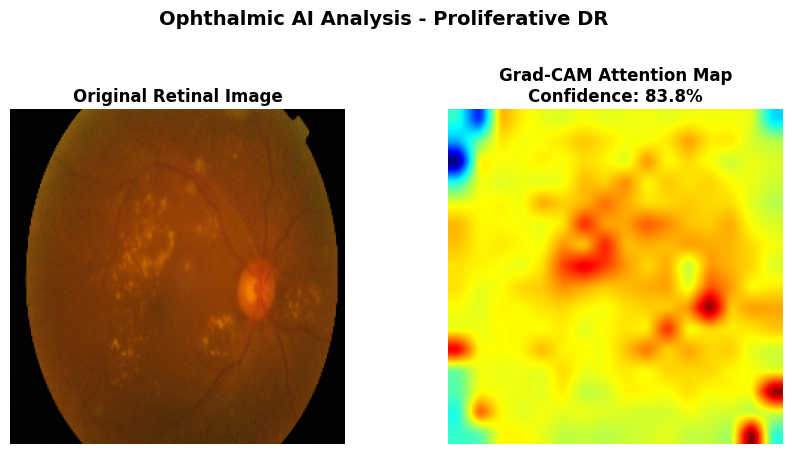

[Orchestrator] INFO: Starting ReAct orchestration - Session: 8833c5a7-e8ce-42e9-a7a6-f0f78b0d1ab2
INFO:Orchestrator:Starting ReAct orchestration - Session: 8833c5a7-e8ce-42e9-a7a6-f0f78b0d1ab2


Analysing: 0e82bcacc475.png


[VisionAgent] INFO: Processed image_id=bbc255e0-1ad2-4ee9-bcc7-1186c43b74b2 | Stage=4 | Confidence=0.9999
INFO:VisionAgent:Processed image_id=bbc255e0-1ad2-4ee9-bcc7-1186c43b74b2 | Stage=4 | Confidence=0.9999
[Orchestrator] INFO: Vision: stage=4, confidence=99.99%
INFO:Orchestrator:Vision: stage=4, confidence=99.99%
[ReasonerAgent] INFO: Reasoning mode switched to: LLM
INFO:ReasonerAgent:Reasoning mode switched to: LLM
[Orchestrator] INFO: Phase 1: LLM reasoning (max 3 attempts)
INFO:Orchestrator:Phase 1: LLM reasoning (max 3 attempts)
[Orchestrator] INFO: Iteration 1: LLM reasoning
INFO:Orchestrator:Iteration 1: LLM reasoning
[ReasonerAgent] INFO: Executing LLM-based medical chain-of-thought reasoning
INFO:ReasonerAgent:Executing LLM-based medical chain-of-thought reasoning
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
[ReasonerAgent] INFO: Reasoning complete for image_id bbc255e0-1ad2-4ee9-bcc7-1186c43b74b2: Proliferative DR with 100.0% confidence
INFO:Reas


🏥 PREDICTION:   Proliferative DR
📈 CONFIDENCE:   100.0%
✓ VALIDATED:     True

REASONING:
As an expert ophthalmologist looking at this diabetic retinopathy case, I need to take it one step at a time. Let's start with the clinical observation. What’s really happening here is that the patient has reached Stage 4 for proliferative diabetic retinopathy. This stage means the damage has started to look a bit more serious, with signs like neovascularization, vitreous hemorrhage, or even praetinar hemorrhage. All these suggest that the disease isn't just quietly progressing; it’s getting to a critical point where care is desperately needed.

Now, let’s check out the diagnostic confidence score, which is a perfect 100.0%. That’s top-notch, confirming the AI model’s insight that we’re dealing with advanced proliferative DR. But wait, a 100% score doesn’t always mean everything is as bad as it could be. Sometimes, a higher score might mean better general health, but here it equals confirmation, 

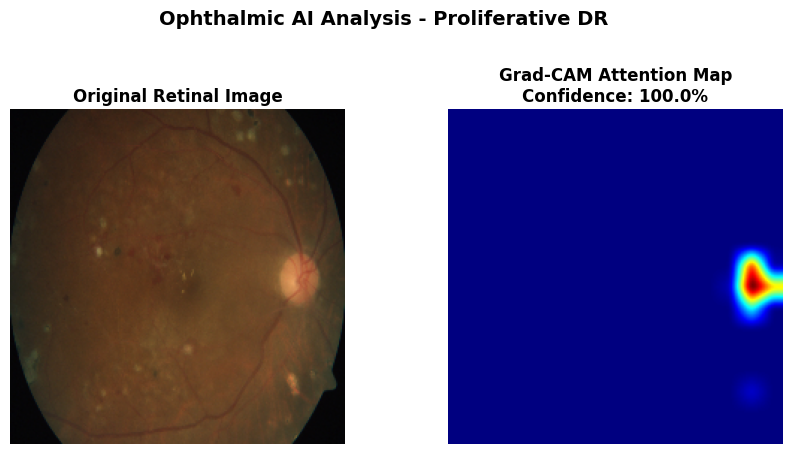

[Orchestrator] INFO: Starting ReAct orchestration - Session: 3f6b2469-2631-4a54-a2ac-50beb645487f
INFO:Orchestrator:Starting ReAct orchestration - Session: 3f6b2469-2631-4a54-a2ac-50beb645487f
[VisionAgent] INFO: Processed image_id=b9baf298-75ff-4f9b-8559-ba518036049d | Stage=3 | Confidence=0.8412
INFO:VisionAgent:Processed image_id=b9baf298-75ff-4f9b-8559-ba518036049d | Stage=3 | Confidence=0.8412
[Orchestrator] INFO: Vision: stage=3, confidence=84.12%
INFO:Orchestrator:Vision: stage=3, confidence=84.12%
[ReasonerAgent] INFO: Reasoning mode switched to: LLM
INFO:ReasonerAgent:Reasoning mode switched to: LLM
[Orchestrator] INFO: Phase 1: LLM reasoning (max 3 attempts)
INFO:Orchestrator:Phase 1: LLM reasoning (max 3 attempts)
[Orchestrator] INFO: Iteration 1: LLM reasoning
INFO:Orchestrator:Iteration 1: LLM reasoning
[ReasonerAgent] INFO: Executing LLM-based medical chain-of-thought reasoning
INFO:ReasonerAgent:Executing LLM-based medical chain-of-thought reasoning
Setting `pad_token_id

Analysing: 1e4b3b823b95.png


[ReasonerAgent] INFO: Reasoning complete for image_id b9baf298-75ff-4f9b-8559-ba518036049d: Severe DR with 84.1% confidence
INFO:ReasonerAgent:Reasoning complete for image_id b9baf298-75ff-4f9b-8559-ba518036049d: Severe DR with 84.1% confidence
[GovernorAgent] INFO: Starting governance validation for trace_id: c8289e8c-c878-42db-8174-b06104830627
INFO:GovernorAgent:Starting governance validation for trace_id: c8289e8c-c878-42db-8174-b06104830627
[GovernorAgent] INFO: Governance complete for trace_id c8289e8c-c878-42db-8174-b06104830627: validated=True, 4/4 rules passed
INFO:GovernorAgent:Governance complete for trace_id c8289e8c-c878-42db-8174-b06104830627: validated=True, 4/4 rules passed
[Orchestrator] INFO: Validation passed on iteration 1
INFO:Orchestrator:Validation passed on iteration 1
[Orchestrator] INFO: Orchestration complete: success=True, iterations=1, time=42.59s
INFO:Orchestrator:Orchestration complete: success=True, iterations=1, time=42.59s



🏥 PREDICTION:   Severe DR
📈 CONFIDENCE:   84.1%
✓ VALIDATED:     True

REASONING:
As an expert ophthalmologist dealing with diabetic retinopathy, I need to thoroughly analyze this retinal image analysis result to gauge the severity and progress of the disease. Here's my step-by-step reasoning:

1. **Clinical Observation**: The detected stage is Stage 3, which is quite serious. This stage indicates that the retinal damage has progressed to a point where it requires intensive attention due to intraretinal hemorrhages and venous beading. These signs suggest that the blood supply to the retina is no longer adequate, which is significant information for the patient’s prognosis.

2. **Diagnostic Confidence Assessment**: The AI model confidence score is 84.1%, which is a key factor. However, I know that such scores can be influenced by various factors like the complexity of the patient's condition, the availability of other diagnostic data, and even the skill of the AI model practitioner. De

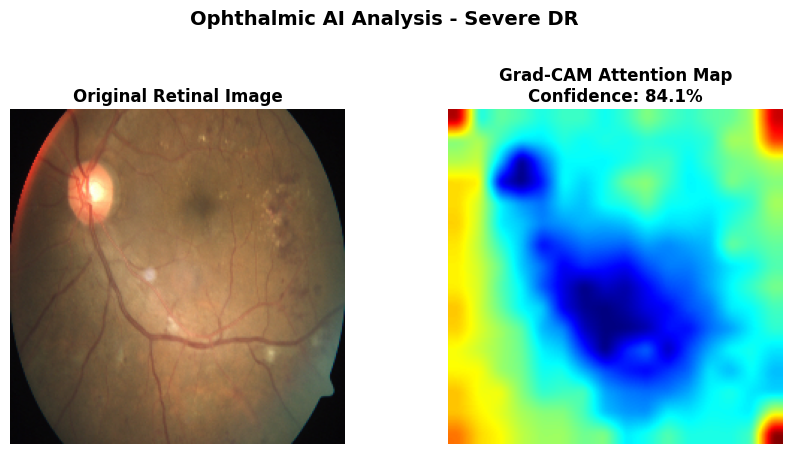

[Orchestrator] INFO: Starting ReAct orchestration - Session: 098406e3-0e37-4308-8ee1-1b8d357db5da
INFO:Orchestrator:Starting ReAct orchestration - Session: 098406e3-0e37-4308-8ee1-1b8d357db5da
[VisionAgent] INFO: Processed image_id=24f15628-485b-42b8-850d-99a8f6ca6ade | Stage=3 | Confidence=0.9383
INFO:VisionAgent:Processed image_id=24f15628-485b-42b8-850d-99a8f6ca6ade | Stage=3 | Confidence=0.9383
[Orchestrator] INFO: Vision: stage=3, confidence=93.83%
INFO:Orchestrator:Vision: stage=3, confidence=93.83%
[ReasonerAgent] INFO: Reasoning mode switched to: LLM
INFO:ReasonerAgent:Reasoning mode switched to: LLM
[Orchestrator] INFO: Phase 1: LLM reasoning (max 3 attempts)
INFO:Orchestrator:Phase 1: LLM reasoning (max 3 attempts)
[Orchestrator] INFO: Iteration 1: LLM reasoning
INFO:Orchestrator:Iteration 1: LLM reasoning
[ReasonerAgent] INFO: Executing LLM-based medical chain-of-thought reasoning
INFO:ReasonerAgent:Executing LLM-based medical chain-of-thought reasoning
Setting `pad_token_id

Analysing: 687759336b0d.png


[ReasonerAgent] INFO: Reasoning complete for image_id 24f15628-485b-42b8-850d-99a8f6ca6ade: Severe DR with 93.8% confidence
INFO:ReasonerAgent:Reasoning complete for image_id 24f15628-485b-42b8-850d-99a8f6ca6ade: Severe DR with 93.8% confidence
[GovernorAgent] INFO: Starting governance validation for trace_id: 80ef1d51-a086-4837-936b-6e9656504767
INFO:GovernorAgent:Starting governance validation for trace_id: 80ef1d51-a086-4837-936b-6e9656504767
[GovernorAgent] INFO: Governance complete for trace_id 80ef1d51-a086-4837-936b-6e9656504767: validated=True, 4/4 rules passed
INFO:GovernorAgent:Governance complete for trace_id 80ef1d51-a086-4837-936b-6e9656504767: validated=True, 4/4 rules passed
[Orchestrator] INFO: Validation passed on iteration 1
INFO:Orchestrator:Validation passed on iteration 1
[Orchestrator] INFO: Orchestration complete: success=True, iterations=1, time=41.86s
INFO:Orchestrator:Orchestration complete: success=True, iterations=1, time=41.86s



🏥 PREDICTION:   Severe DR
📈 CONFIDENCE:   93.8%
✓ VALIDATED:     True

REASONING:
As an expert ophthalmologist dealing with diabetic retinopathy, I need to thoroughly analyze this retinal image analysis result to assess the patient's condition. The detected stage is Stage 3, which is quite serious due to the presence of extensive intraretinal hemorrhages, venous beading, and microvascular abnormalities. These findings indicate a advanced stage that demands close attention.

I see the AI model confidence score is 93.8%, which suggests there's a significant belief in the diagnosis, but it's always good to verify this beyond just statistics. I should consider other factors that could influence this confidence, like the patient's overall health, any previous treatments they received, and how closely they followed up with follow-up appointments.

Now, about the risk stratification, I notice this is a severe case indeed. Advanced stages of diabetic retinopathy often mean a higher risk of co

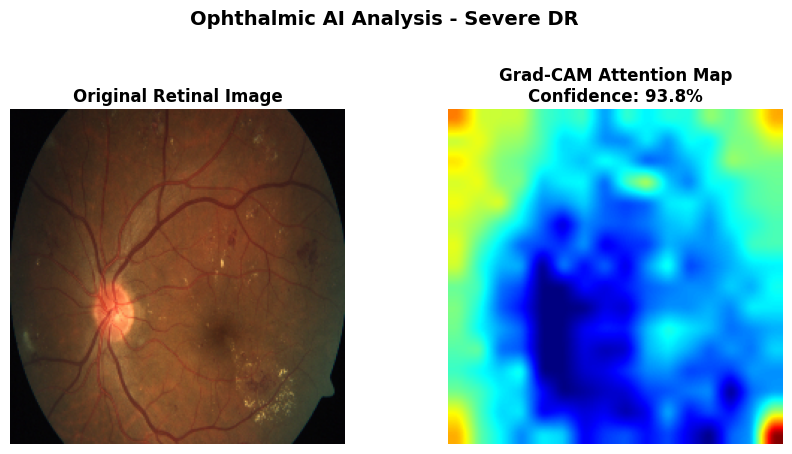

[Orchestrator] INFO: Starting ReAct orchestration - Session: d8d30426-976c-4ea6-8dc1-94e4ff3c35c4
INFO:Orchestrator:Starting ReAct orchestration - Session: d8d30426-976c-4ea6-8dc1-94e4ff3c35c4
[VisionAgent] INFO: Processed image_id=c1f79729-7cf2-4367-8e14-a7699718e71a | Stage=4 | Confidence=1.0000
INFO:VisionAgent:Processed image_id=c1f79729-7cf2-4367-8e14-a7699718e71a | Stage=4 | Confidence=1.0000
[Orchestrator] INFO: Vision: stage=4, confidence=100.00%
INFO:Orchestrator:Vision: stage=4, confidence=100.00%
[ReasonerAgent] INFO: Reasoning mode switched to: LLM
INFO:ReasonerAgent:Reasoning mode switched to: LLM
[Orchestrator] INFO: Phase 1: LLM reasoning (max 3 attempts)
INFO:Orchestrator:Phase 1: LLM reasoning (max 3 attempts)
[Orchestrator] INFO: Iteration 1: LLM reasoning
INFO:Orchestrator:Iteration 1: LLM reasoning
[ReasonerAgent] INFO: Executing LLM-based medical chain-of-thought reasoning
INFO:ReasonerAgent:Executing LLM-based medical chain-of-thought reasoning
Setting `pad_token_

Analysing: 0ada12c0e78f.png


[ReasonerAgent] INFO: Reasoning complete for image_id c1f79729-7cf2-4367-8e14-a7699718e71a: Proliferative DR with 100.0% confidence
INFO:ReasonerAgent:Reasoning complete for image_id c1f79729-7cf2-4367-8e14-a7699718e71a: Proliferative DR with 100.0% confidence
[GovernorAgent] INFO: Starting governance validation for trace_id: 5044e400-c0a1-42ab-9c7a-e4bee487cb32
INFO:GovernorAgent:Starting governance validation for trace_id: 5044e400-c0a1-42ab-9c7a-e4bee487cb32
[GovernorAgent] INFO: Governance complete for trace_id 5044e400-c0a1-42ab-9c7a-e4bee487cb32: validated=True, 4/4 rules passed
INFO:GovernorAgent:Governance complete for trace_id 5044e400-c0a1-42ab-9c7a-e4bee487cb32: validated=True, 4/4 rules passed
[Orchestrator] INFO: Validation passed on iteration 1
INFO:Orchestrator:Validation passed on iteration 1
[Orchestrator] INFO: Orchestration complete: success=True, iterations=1, time=42.18s
INFO:Orchestrator:Orchestration complete: success=True, iterations=1, time=42.18s



🏥 PREDICTION:   Proliferative DR
📈 CONFIDENCE:   100.0%
✓ VALIDATED:     True

REASONING:
As an expert ophthalmologist looking at this diabetic retinopathy case, I need to take it one step at a time. Let's start with the vision analysis system report. It tells me that this is Stage 4 proliferative diabetic retinopathy. This isn't just a straightforward case; stages beyond the first are always concerning because they involve more significant damage to the retina. Proliferative DR means we’re dealing with cells that are getting bigger and possibly invading the blood vessels. That invasion can spell trouble since it may lead to neovascularization, which is like new blood vessel growth, or even vitreous hemorrhage—where blood leaks into the retina—or maybe even a bleed into a pre-existing artery, what we call praeterine hemorrhage.

Next, there’s the AI model confidence score of 100.0%. That’s perfect. It tells me we can trust this diagnosis quite confidently. But wait, AI sometimes strug

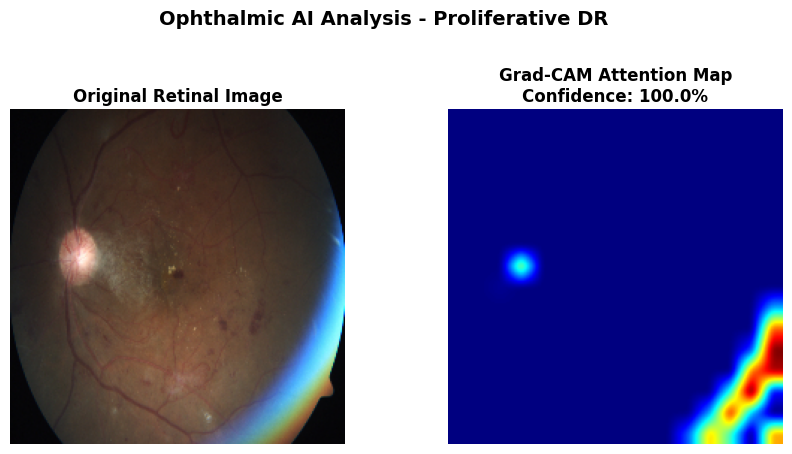

[Orchestrator] INFO: Starting ReAct orchestration - Session: a6f09363-d707-440a-aa16-1a8c07738539
INFO:Orchestrator:Starting ReAct orchestration - Session: a6f09363-d707-440a-aa16-1a8c07738539
[VisionAgent] INFO: Processed image_id=44c0569c-17a4-44ec-8e2c-cccc17b79f31 | Stage=4 | Confidence=0.9892
INFO:VisionAgent:Processed image_id=44c0569c-17a4-44ec-8e2c-cccc17b79f31 | Stage=4 | Confidence=0.9892
[Orchestrator] INFO: Vision: stage=4, confidence=98.92%
INFO:Orchestrator:Vision: stage=4, confidence=98.92%
[ReasonerAgent] INFO: Reasoning mode switched to: LLM
INFO:ReasonerAgent:Reasoning mode switched to: LLM
[Orchestrator] INFO: Phase 1: LLM reasoning (max 3 attempts)
INFO:Orchestrator:Phase 1: LLM reasoning (max 3 attempts)
[Orchestrator] INFO: Iteration 1: LLM reasoning
INFO:Orchestrator:Iteration 1: LLM reasoning
[ReasonerAgent] INFO: Executing LLM-based medical chain-of-thought reasoning
INFO:ReasonerAgent:Executing LLM-based medical chain-of-thought reasoning
Setting `pad_token_id

Analysing: 1a7e3356b39c.png


[ReasonerAgent] INFO: Reasoning complete for image_id 44c0569c-17a4-44ec-8e2c-cccc17b79f31: Proliferative DR with 98.9% confidence
INFO:ReasonerAgent:Reasoning complete for image_id 44c0569c-17a4-44ec-8e2c-cccc17b79f31: Proliferative DR with 98.9% confidence
[GovernorAgent] INFO: Starting governance validation for trace_id: f2d893bd-d444-4f5e-bbb9-6dfaad5075af
INFO:GovernorAgent:Starting governance validation for trace_id: f2d893bd-d444-4f5e-bbb9-6dfaad5075af
[GovernorAgent] INFO: Governance complete for trace_id f2d893bd-d444-4f5e-bbb9-6dfaad5075af: validated=True, 4/4 rules passed
INFO:GovernorAgent:Governance complete for trace_id f2d893bd-d444-4f5e-bbb9-6dfaad5075af: validated=True, 4/4 rules passed
[Orchestrator] INFO: Validation passed on iteration 1
INFO:Orchestrator:Validation passed on iteration 1
[Orchestrator] INFO: Orchestration complete: success=True, iterations=1, time=41.56s
INFO:Orchestrator:Orchestration complete: success=True, iterations=1, time=41.56s



🏥 PREDICTION:   Proliferative DR
📈 CONFIDENCE:   98.9%
✓ VALIDATED:     True

REASONING:
As an expert ophthalmologist looking at this diabetic retinopathy case, I need to take it one step at a time. Let's start with the observation. The detected stage is Stage 4, which means we're looking at advanced proliferative diabetic retinopathy. This doesn't look good because proliferative DR is serious and usually means the disease could progress rapidly. Identifying neovascularization, vitreous hemorrhage, or premalignant hemorrhage are key features here. Neovascularization often suggests aggressive disease, while vitreous or premalignant hemorrhages might indicate severe inflammation or damage. These features alone suggest this is a non-trivial case requiring in-depth analysis.

Next, let's assess the diagnostic confidence. The AI model has a confidence score of 98.9%, which is quite high, but remember, AI isn't a predictor of clinical status. I need to consider other things that might affec

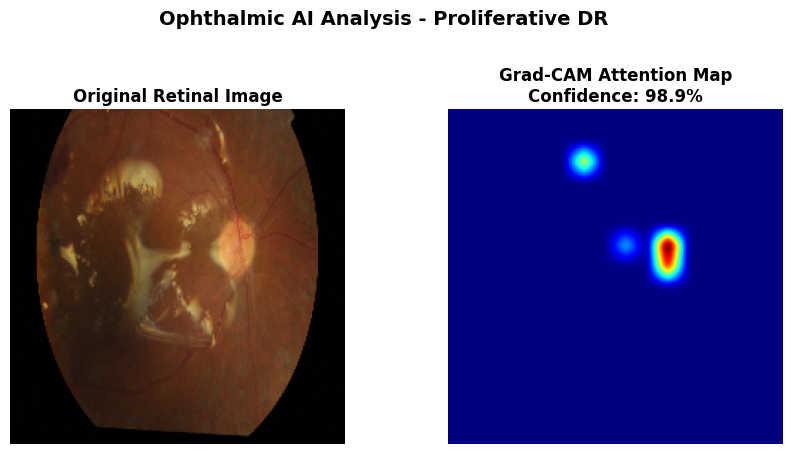

[Orchestrator] INFO: Starting ReAct orchestration - Session: 3c9bebcd-bcdc-4b7c-aaba-bed4a5bb68e6
INFO:Orchestrator:Starting ReAct orchestration - Session: 3c9bebcd-bcdc-4b7c-aaba-bed4a5bb68e6
[VisionAgent] INFO: Processed image_id=7e8402fc-79a5-4f06-ba24-e11ed02606e9 | Stage=4 | Confidence=0.9538
INFO:VisionAgent:Processed image_id=7e8402fc-79a5-4f06-ba24-e11ed02606e9 | Stage=4 | Confidence=0.9538
[Orchestrator] INFO: Vision: stage=4, confidence=95.38%
INFO:Orchestrator:Vision: stage=4, confidence=95.38%
[ReasonerAgent] INFO: Reasoning mode switched to: LLM
INFO:ReasonerAgent:Reasoning mode switched to: LLM
[Orchestrator] INFO: Phase 1: LLM reasoning (max 3 attempts)
INFO:Orchestrator:Phase 1: LLM reasoning (max 3 attempts)
[Orchestrator] INFO: Iteration 1: LLM reasoning
INFO:Orchestrator:Iteration 1: LLM reasoning
[ReasonerAgent] INFO: Executing LLM-based medical chain-of-thought reasoning
INFO:ReasonerAgent:Executing LLM-based medical chain-of-thought reasoning
Setting `pad_token_id

Analysing: 2a3378bcfbcc.png


[ReasonerAgent] INFO: Reasoning complete for image_id 7e8402fc-79a5-4f06-ba24-e11ed02606e9: Proliferative DR with 95.4% confidence
INFO:ReasonerAgent:Reasoning complete for image_id 7e8402fc-79a5-4f06-ba24-e11ed02606e9: Proliferative DR with 95.4% confidence
[GovernorAgent] INFO: Starting governance validation for trace_id: b926d453-ee3c-4d17-9015-3972f6432dea
INFO:GovernorAgent:Starting governance validation for trace_id: b926d453-ee3c-4d17-9015-3972f6432dea
[GovernorAgent] INFO: Governance complete for trace_id b926d453-ee3c-4d17-9015-3972f6432dea: validated=True, 4/4 rules passed
INFO:GovernorAgent:Governance complete for trace_id b926d453-ee3c-4d17-9015-3972f6432dea: validated=True, 4/4 rules passed
[Orchestrator] INFO: Validation passed on iteration 1
INFO:Orchestrator:Validation passed on iteration 1
[Orchestrator] INFO: Orchestration complete: success=True, iterations=1, time=42.01s
INFO:Orchestrator:Orchestration complete: success=True, iterations=1, time=42.01s



🏥 PREDICTION:   Proliferative DR
📈 CONFIDENCE:   95.4%
✓ VALIDATED:     True

REASONING:
As an expert ophthalmologist looking at this diabetic retinopathy case, I need to take it one step at a time. Let's start with the clinical observation. What I'm seeing here is Stage 4 proliferative DR. This suggests the retina is starting to get affected by new blood vessels forming, which isn't great news. It usually means the disease isn't just progressing on its own, so something more needs to be done.

Next, let's look at the diagnostic confidence score. A 95.4% score seems pretty reliable, but I should think about whether this aligns with the observed symptoms like neovascularization and vitreous hemorrhage. Sometimes AI models pick up noise, so maybe a deeper dive is called for confirmation.

Now, onto the risk stratification. The patient's stage is Stage 4, which screams severity. progression, especially if there are no interventions. In a nutshell, this means we need to act fast. Progress

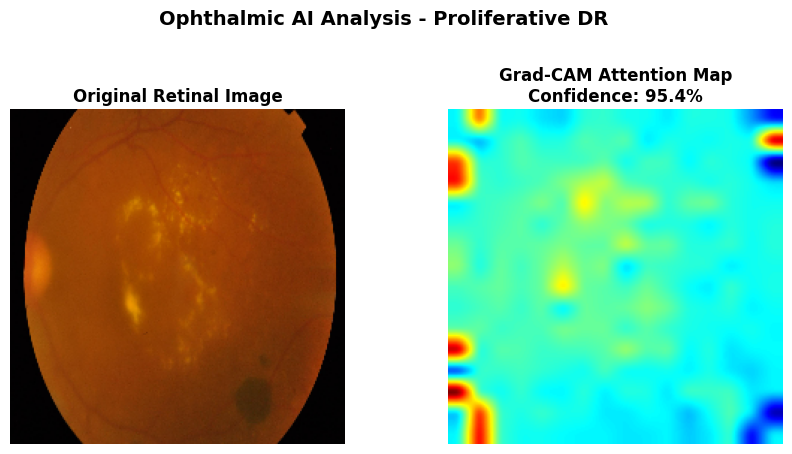

[Orchestrator] INFO: Starting ReAct orchestration - Session: 084a206a-55fc-4a72-a2b3-7833e432503b
INFO:Orchestrator:Starting ReAct orchestration - Session: 084a206a-55fc-4a72-a2b3-7833e432503b
[VisionAgent] INFO: Processed image_id=a1dd4e04-2489-4534-b5ca-4e03dc384482 | Stage=2 | Confidence=0.7645
INFO:VisionAgent:Processed image_id=a1dd4e04-2489-4534-b5ca-4e03dc384482 | Stage=2 | Confidence=0.7645
[Orchestrator] INFO: Vision: stage=2, confidence=76.45%
INFO:Orchestrator:Vision: stage=2, confidence=76.45%
[ReasonerAgent] INFO: Reasoning mode switched to: LLM
INFO:ReasonerAgent:Reasoning mode switched to: LLM
[Orchestrator] INFO: Phase 1: LLM reasoning (max 3 attempts)
INFO:Orchestrator:Phase 1: LLM reasoning (max 3 attempts)
[Orchestrator] INFO: Iteration 1: LLM reasoning
INFO:Orchestrator:Iteration 1: LLM reasoning
[ReasonerAgent] INFO: Executing LLM-based medical chain-of-thought reasoning
INFO:ReasonerAgent:Executing LLM-based medical chain-of-thought reasoning
Setting `pad_token_id

Analysing: 0ceb222f6629.png


[ReasonerAgent] INFO: Reasoning complete for image_id a1dd4e04-2489-4534-b5ca-4e03dc384482: Moderate DR with 76.4% confidence
INFO:ReasonerAgent:Reasoning complete for image_id a1dd4e04-2489-4534-b5ca-4e03dc384482: Moderate DR with 76.4% confidence
[GovernorAgent] INFO: Starting governance validation for trace_id: 23aae6fc-ede9-44ac-9ec1-72fbe68c01c3
INFO:GovernorAgent:Starting governance validation for trace_id: 23aae6fc-ede9-44ac-9ec1-72fbe68c01c3
[GovernorAgent] INFO: Governance complete for trace_id 23aae6fc-ede9-44ac-9ec1-72fbe68c01c3: validated=True, 4/4 rules passed
INFO:GovernorAgent:Governance complete for trace_id 23aae6fc-ede9-44ac-9ec1-72fbe68c01c3: validated=True, 4/4 rules passed
[Orchestrator] INFO: Validation passed on iteration 1
INFO:Orchestrator:Validation passed on iteration 1
[Orchestrator] INFO: Orchestration complete: success=True, iterations=1, time=41.45s
INFO:Orchestrator:Orchestration complete: success=True, iterations=1, time=41.45s



🏥 PREDICTION:   Moderate DR
📈 CONFIDENCE:   76.4%
✓ VALIDATED:     True

REASONING:
As an expert ophthalmologist dealing with diabetic retinopathy, I need to take a closer look at this patient's situation using the Vision Analysis System's findings. The detected stage is Stage 2 - Moderate DR, and there's a 76.4% AI model confidence score. Let's break this down.

First, I'm assessing the current pathology. Microaneurysms, retinal hemorrhages, and possibly hard exudates all sound concerning at this stage. This suggests significant, but not overwhelmingly so, disease progress. It's moderately severe yet not quite severe enough to be considered advanced.

Next, I'll check how well this aligns with the patient's overall health. The expected clinical features match up with what we've got, showing microaneurysms, retinal hemorrhages, and some hard exudates present. These are indicative of moderate disease, confirming my earlier assessment.

Now, thinking about the patient's longer-term risk

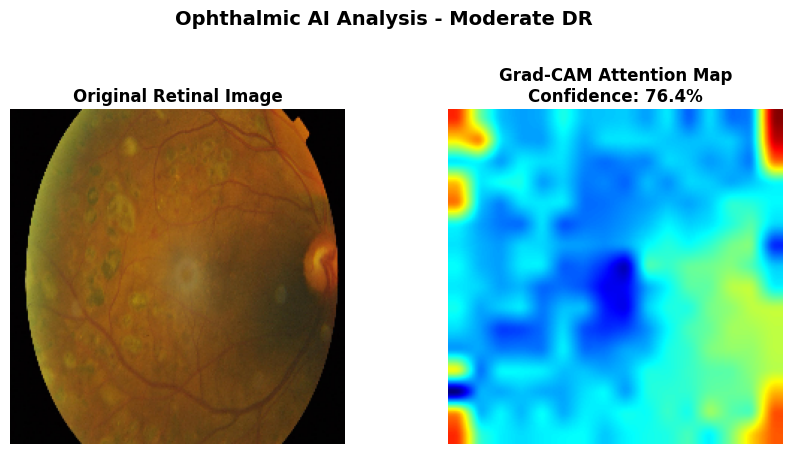

[Orchestrator] INFO: Starting ReAct orchestration - Session: 21eee661-51d9-4132-a7dd-7b29c3ba0853
INFO:Orchestrator:Starting ReAct orchestration - Session: 21eee661-51d9-4132-a7dd-7b29c3ba0853
[VisionAgent] INFO: Processed image_id=f1ea78cf-f5ed-477e-a399-749d09426644 | Stage=2 | Confidence=0.7867
INFO:VisionAgent:Processed image_id=f1ea78cf-f5ed-477e-a399-749d09426644 | Stage=2 | Confidence=0.7867
[Orchestrator] INFO: Vision: stage=2, confidence=78.67%
INFO:Orchestrator:Vision: stage=2, confidence=78.67%
[ReasonerAgent] INFO: Reasoning mode switched to: LLM
INFO:ReasonerAgent:Reasoning mode switched to: LLM
[Orchestrator] INFO: Phase 1: LLM reasoning (max 3 attempts)
INFO:Orchestrator:Phase 1: LLM reasoning (max 3 attempts)
[Orchestrator] INFO: Iteration 1: LLM reasoning
INFO:Orchestrator:Iteration 1: LLM reasoning
[ReasonerAgent] INFO: Executing LLM-based medical chain-of-thought reasoning
INFO:ReasonerAgent:Executing LLM-based medical chain-of-thought reasoning
Setting `pad_token_id

Analysing: 1e143fa3de57.png


[ReasonerAgent] INFO: Reasoning complete for image_id f1ea78cf-f5ed-477e-a399-749d09426644: Moderate DR with 78.7% confidence
INFO:ReasonerAgent:Reasoning complete for image_id f1ea78cf-f5ed-477e-a399-749d09426644: Moderate DR with 78.7% confidence
[GovernorAgent] INFO: Starting governance validation for trace_id: cb0022d1-ce10-4f85-8613-5d565385ede1
INFO:GovernorAgent:Starting governance validation for trace_id: cb0022d1-ce10-4f85-8613-5d565385ede1
[GovernorAgent] INFO: Governance complete for trace_id cb0022d1-ce10-4f85-8613-5d565385ede1: validated=True, 4/4 rules passed
INFO:GovernorAgent:Governance complete for trace_id cb0022d1-ce10-4f85-8613-5d565385ede1: validated=True, 4/4 rules passed
[Orchestrator] INFO: Validation passed on iteration 1
INFO:Orchestrator:Validation passed on iteration 1
[Orchestrator] INFO: Orchestration complete: success=True, iterations=1, time=42.08s
INFO:Orchestrator:Orchestration complete: success=True, iterations=1, time=42.08s



🏥 PREDICTION:   Moderate DR
📈 CONFIDENCE:   78.7%
✓ VALIDATED:     True

REASONING:
As an expert ophthalmologist dealing with diabetic retinopathy, I need to take a closer look at this patient's situation using the Vision Analysis System's findings. The detected stage is Stage 2 - Moderate DR, and there's a 78.7% AI model confidence score. Let's break this down.

First, let's talk about the detected stage. Being at Stage 2 means the damage is somewhat controlled, but there are signs like microaneurysms, retinal hemorrhages, and maybe hard exudates still present. This isn't as severe as Stage 1, which suggests better manageability. But, I can't ignore the fact that even Stage 2 at this confidence level has significant pathology.

Next up, I need to think about the AI confidence. A score of 78.7% is generally considered moderate. Hmm, this means the AI thinks there's an 8-10% chance it's wrong. That's not terrible, but we can't ignore it either. Sometimes these scores consider different

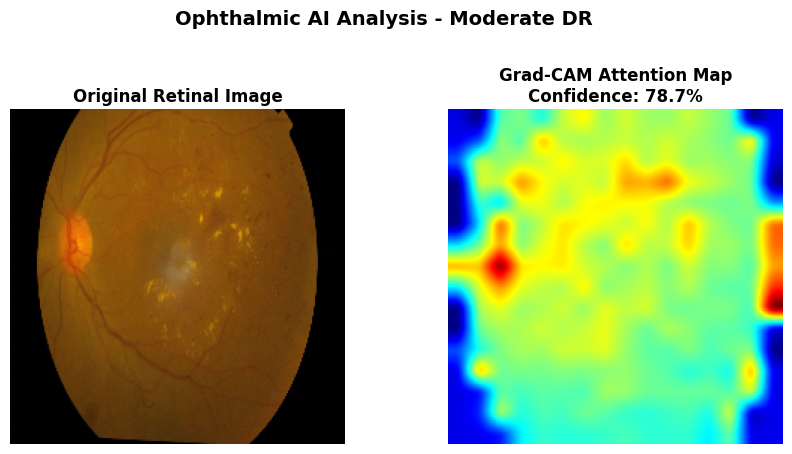

[Orchestrator] INFO: Starting ReAct orchestration - Session: 3d8c1a66-70cd-4b63-82b2-8542d480395d
INFO:Orchestrator:Starting ReAct orchestration - Session: 3d8c1a66-70cd-4b63-82b2-8542d480395d
[VisionAgent] INFO: Processed image_id=50247635-e42e-42bd-8f6b-8b2da9f1e5f0 | Stage=3 | Confidence=0.9980
INFO:VisionAgent:Processed image_id=50247635-e42e-42bd-8f6b-8b2da9f1e5f0 | Stage=3 | Confidence=0.9980
[Orchestrator] INFO: Vision: stage=3, confidence=99.80%
INFO:Orchestrator:Vision: stage=3, confidence=99.80%
[ReasonerAgent] INFO: Reasoning mode switched to: LLM
INFO:ReasonerAgent:Reasoning mode switched to: LLM
[Orchestrator] INFO: Phase 1: LLM reasoning (max 3 attempts)
INFO:Orchestrator:Phase 1: LLM reasoning (max 3 attempts)
[Orchestrator] INFO: Iteration 1: LLM reasoning
INFO:Orchestrator:Iteration 1: LLM reasoning
[ReasonerAgent] INFO: Executing LLM-based medical chain-of-thought reasoning
INFO:ReasonerAgent:Executing LLM-based medical chain-of-thought reasoning
Setting `pad_token_id

Analysing: 51269b77d312.png


[ReasonerAgent] INFO: Reasoning complete for image_id 50247635-e42e-42bd-8f6b-8b2da9f1e5f0: Severe DR with 99.8% confidence
INFO:ReasonerAgent:Reasoning complete for image_id 50247635-e42e-42bd-8f6b-8b2da9f1e5f0: Severe DR with 99.8% confidence
[GovernorAgent] INFO: Starting governance validation for trace_id: 8345172f-f2e4-41a8-ae75-352c6223a5aa
INFO:GovernorAgent:Starting governance validation for trace_id: 8345172f-f2e4-41a8-ae75-352c6223a5aa
[GovernorAgent] INFO: Governance complete for trace_id 8345172f-f2e4-41a8-ae75-352c6223a5aa: validated=True, 4/4 rules passed
INFO:GovernorAgent:Governance complete for trace_id 8345172f-f2e4-41a8-ae75-352c6223a5aa: validated=True, 4/4 rules passed
[Orchestrator] INFO: Validation passed on iteration 1
INFO:Orchestrator:Validation passed on iteration 1
[Orchestrator] INFO: Orchestration complete: success=True, iterations=1, time=41.58s
INFO:Orchestrator:Orchestration complete: success=True, iterations=1, time=41.58s



🏥 PREDICTION:   Severe DR
📈 CONFIDENCE:   99.8%
✓ VALIDATED:     True

REASONING:
As an expert ophthalmologist dealing with diabetic retinopathy, I need to take a closer look at this patient's situation using the Vision Analysis System's findings. The detected stage is Stage 3, which is pretty severe, indicating that the retinal damage is quite profound. This isn't just about mild redness or minor bruising; it's about serious vision loss that requires immediate attention.

The AI model confidence score is impressively high at 99.8%. This suggests a lot more certainty about the diagnosis than a typical diagnosis, which is reassuring but also makes me curious about the broader context. I should consider all available information to see if there are factors beyond just the diagnostic test results, like the patient's history or other symptoms.

Given the serious stage, the probability of complications like retinal artery occlusions or venous beading cannot be ignored. These are not someth

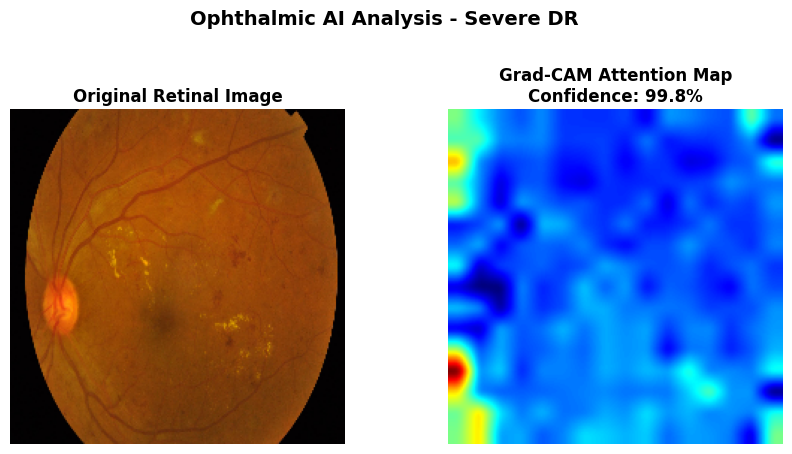

In [8]:
test_images_path = "/content/dr-agent/images"
file_names = [
    "042470a92154.png",
    "0e82bcacc475.png",
    "1e4b3b823b95.png",
    "687759336b0d.png",
    "0ada12c0e78f.png",
    "1a7e3356b39c.png",
    "2a3378bcfbcc.png",
    "0ceb222f6629.png",
    "1e143fa3de57.png",
    "51269b77d312.png",
]

for file_name in file_names:
    full_path = f"{test_images_path}/{file_name}"
    print(f"Analysing: {file_name}")
    result = orchestrator.execute(full_path)
    visualize_ophthalmology_analysis(result, full_path)